In [ ]:
%pip install -Uqq matplotlib
%pip install -Uqq seaborn
%pip install -Uqq numpy
%pip install -Uqq pandas
%pip install -Uqq scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks, peak_widths
from scipy import optimize
from time import sleep

In [ ]:
from numpy import piecewise

def piecewise_linear(x, a, b1, b2):
    return np.piecewise(x, [x < 4, x>=4], [lambda x:a*x + b1, lambda x:a*x + b2])

In [ ]:
%run decode.py ~/Downloads/Driftkammer/2000V.dat

Reading in events measurend with 8 channels on 2 board(s)...
Event :  1000         



In [ ]:
data = np.array(data)

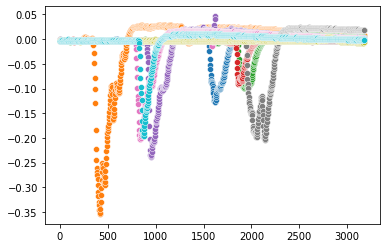

In [ ]:
start_event = 500
ch = 0
for event in range(start_event, start_event+10):
    v_e1ch1 = data[event,ch,1]
    t_e1ch1 = data[event,ch,0]
    sns.scatterplot(x=t_e1ch1, y=v_e1ch1)
    
    

Peaks data: (array([278]), {'peak_heights': array([0.19715419]), 'prominences': array([0.19670405]), 'left_bases': array([24]), 'right_bases': array([536]), 'widths': array([26.95413532]), 'width_heights': array([0.09880217]), 'left_ips': array([271.18672444]), 'right_ips': array([298.14085976])})
Widths: (array([26.95413532]), array([0.09880217]), array([271.18672444]), array([298.14085976]))


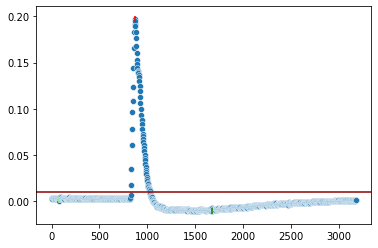

In [ ]:
height = 0.01
prominence = 0.01
tick_height = 0.003
width = 10
peaks = find_peaks(-v_e1ch1, height=height, width=width, prominence=prominence)
widths = peak_widths(-v_e1ch1, peaks=peaks[0], rel_height=0.5)

peaks_v = v_e1ch1[peaks[0]]
peaks_t = t_e1ch1[peaks[0]]
peaks_v_left = v_e1ch1[peaks[1]['left_bases']]
peaks_v_right = v_e1ch1[peaks[1]['right_bases']]
peaks_t_left = t_e1ch1[peaks[1]['left_bases']]
peaks_t_right = t_e1ch1[peaks[1]['right_bases']]

ax,fig = plt.subplots(1, 1)
gr = sns.scatterplot(x=t_e1ch1, y=-v_e1ch1)
# sns.scatterplot(x=peaks_t, y=-peaks_v, color='red')

plt.vlines(peaks_t_left, ymin=-peaks_v_left-tick_height, ymax=-peaks_v_left+tick_height, color='lightgreen')
plt.vlines(peaks_t_right, ymin=-peaks_v_right-tick_height, ymax=-peaks_v_right+tick_height, color='green')

plt.vlines(peaks_t, ymin=-peaks_v-tick_height, ymax=-peaks_v+tick_height, color='red')
gr.axhline(height, color='darkred')
print(f'Peaks data: {peaks}')
print(f'Widths: {widths}')

p: [ -26.79960885 1552.49949272 1699.65856033], e: [[ 1249.35362179 -1874.03045771 -6871.44500785]
 [-1874.03045771  5934.42924884 10307.16764942]
 [-6871.44500785 10307.16764942 40916.33158183]]


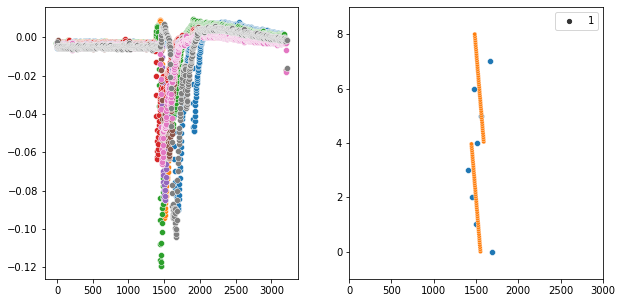

In [ ]:
i = 24
times =[]
fig, ax = plt.subplots(1,2, figsize=(10, 5))
channels = np.arange(8)
for ch in channels:
    peaks = find_peaks(-data[i, ch, 1], height=height, width=width, prominence=prominence)
    sns.scatterplot(x = data[i, ch, 0], y=data[i, ch, 1], ax=ax[0])
    times.append(data[i, ch, 0, peaks[0][0]])

sns.scatterplot(x=times, y=channels, ax=ax[1])
ax[1].set_xlim((0, 3000))
ax[1].set_ylim((-1, 9))
p, e = optimize.curve_fit(piecewise_linear, channels, times)
ch = np.linspace(0, 8, 100)
sns.scatterplot(y=ch, x=piecewise_linear(ch, *p), size=1)
print(f'p: {p}, e: {e}')

In [ ]:
arr = np.arange(24)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
arr3 = arr.reshape(2,3,-1)
arr3

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
arr3.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
arr.repeat(3, axis=0)

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23])